In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

In [2]:
df=pd.read_csv('house_prices.csv')

In [3]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
df.shape

(187531, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [8]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [9]:
df['Title']

0         1 BHK Ready to Occupy Flat for sale in Srushti...
1         2 BHK Ready to Occupy Flat for sale in Dosti V...
2         2 BHK Ready to Occupy Flat for sale in Sunrise...
3               1 BHK Ready to Occupy Flat for sale Kasheli
4         2 BHK Ready to Occupy Flat for sale in TenX Ha...
                                ...                        
187526    3 BHK Ready to Occupy Flat for sale in Bollywo...
187527    3 BHK Ready to Occupy Flat for sale in Sushma ...
187528    3 BHK Ready to Occupy Flat for sale in Bollywo...
187529    2 BHK Ready to Occupy Flat for sale in Friends...
187530    3 BHK Ready to Occupy Flat for sale in Affinit...
Name: Title, Length: 187531, dtype: object

In [10]:
df['Title'][0]

'1 BHK Ready to Occupy Flat for sale in Srushti Siddhi Mangal Murti Complex Bhiwandi'

In [11]:
df['Title'][1]

'2 BHK Ready to Occupy Flat for sale in Dosti Vihar Pokhran Road'

In [12]:
df['Title'][2]

'2 BHK Ready to Occupy Flat for sale in Sunrise by Kalpataru Kolshet Road'

In [13]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [14]:
df['Title'][0].split('BHK')

['1 ',
 ' Ready to Occupy Flat for sale in Srushti Siddhi Mangal Murti Complex Bhiwandi']

In [15]:
df['Title'][0].split('BHK')[0].strip()

'1'

In [16]:
def BHK_extractor(text):
    return text.split('BHK')[0].strip()

In [17]:
df['BHK']=df['Title'].apply(BHK_extractor)

In [18]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN,2


In [19]:
df['BHK'].dtype

dtype('O')

In [20]:
df['BHK'].unique()

array(['1', '2', '3', '4', '5', 'Studio Apartment for sale Dombivli East',
       'Studio Apartment for sale Vartak Nagar',
       'Studio Apartment for sale in Lok Nagari Phase III Ambernath East',
       '6', 'Studio Apartment for sale Asangaon',
       'Apartment for sale Kisan Nagar',
       'Studio Apartment for sale Badlapur West',
       'Studio Apartment for sale in Hiranandani Solitaire Hiranandani Estate',
       'Studio Apartment for sale Thane West',
       'Studio Apartment for sale Badlapur (East) Thane',
       'Studio Apartment for sale Kalyan',
       'Studio Apartment for sale Nandivali Gaon',
       'Studio Apartment for sale Dombivli',
       'Studio Apartment for sale Ambernath',
       'Studio Apartment for sale Kalyan East',
       'Studio Apartment for sale in Mhatre Apt Nandivli',
       'Studio Apartment for sale Talav Pali',
       'Studio Apartment for sale in Sun Flash Apartment Vashi',
       'Studio Apartment for sale in Prakriti Sparsh New Panvel',
     

In [21]:
def BHK_extractor2(text):
    if 'Studio Apartment' in text:
        return '1'
    else:
        return text

In [22]:
df['BHK']=df['BHK'].apply(BHK_extractor2)

In [23]:
df['BHK'].value_counts()

3                                                                         80848
2                                                                         75508
4                                                                         16600
1                                                                         13174
5                                                                          1183
6                                                                            98
> 10                                                                         32
7                                                                            22
8                                                                            17
10                                                                           11
9                                                                             7
Apartment for sale S R Layout Murgesh Pallya                                  3
Apartment for sale in Shivam Parivar Sid

In [24]:
def BHK_extractor3(text):
    if 'Apartment' in text:
        return 'Apartment'
    elif 'Builder' in text:
        return 'Builder'
    else:
        return text

In [25]:
df['BHK']=df['BHK'].apply(BHK_extractor3)

In [26]:
df['BHK'].value_counts()

3            80848
2            75508
4            16600
1            13174
5             1183
6               98
> 10            32
Apartment       29
7               22
8               17
10              11
9                7
Builder          2
Name: BHK, dtype: int64

In [27]:
drop_items=['> 10','Apartment','7','8','9','10','6','Builder']
for i in drop_items:
    df=df[df['BHK']!=i]

In [28]:
df['BHK'].value_counts()

3    80848
2    75508
4    16600
1    13174
5     1183
Name: BHK, dtype: int64

In [29]:
df.shape

(187313, 22)

In [30]:
df['BHK'].dtype

dtype('O')

In [31]:
df['BHK']=df['BHK'].astype('int')

In [32]:
df['BHK'].dtype

dtype('int32')

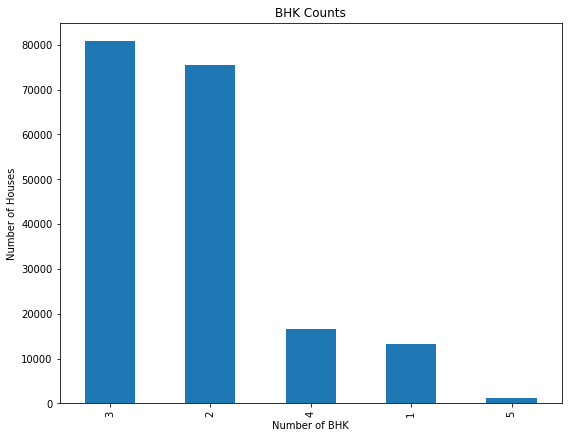

In [33]:
plt.figure(figsize=(9,7))
df['BHK'].value_counts().plot(kind='bar')
plt.title('BHK Counts')
plt.xlabel('Number of BHK')
plt.ylabel('Number of Houses')
plt.show()

In [34]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
143364,143364,2 BHK Ready to Occupy Flat for sale in Mahagun...,Carefully laid out in the prime location of Se...,1.10 Cr,8800.0,noida,NaN,Ready to Move,10 out of 23,Resale,...,Main Road,NaN,2,3,2 Covered,Leasehold,1250 sqft,NaN,NaN,2
113691,113691,2 BHK Ready to Occupy Flat for sale Sec 13 Awa...,This magnificent 2 BHK Flat is available for s...,42 Lac,4941.0,lucknow,700 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,2
10615,10615,3 BHK Ready to Occupy Flat for sale in Swastik...,Up for immediate sale is a 3 BHK apartment in ...,65 Lac,4151.0,ahmedabad,103 sqyrd,Ready to Move,12 out of 14,Resale,...,"Garden/Park, Main Road",Swastik Riviera,3,1,1 Covered,Freehold,NaN,NaN,NaN,3
62087,62087,4 BHK Ready to Occupy Flat for sale in Pioneer...,"This lovely 4 BHK Flat in Sector 62, Gurgaon i...",8.96 Cr,18000.0,gurgaon,4583 sqft,Ready to Move,9 out of 30,New Property,...,Garden/Park,Pioneer Araya,5,4,2 Covered,Freehold,NaN,NaN,NaN,4
116813,116813,4 BHK Ready to Occupy Flat for sale in Green p...,4 BHK flat available for sale in New Delhi in ...,5.05 Cr,20200.0,new-delhi,2450 sqft,Ready to Move,1 out of 4,New Property,...,Garden/Park,Green park extension,4,2,2 Covered,Freehold,NaN,NaN,NaN,4


In [35]:
df['Description'][0]

'Bhiwandi, Thane has an attractive 1 BHK Flat for sale. The property is ideally located in a strategic location in Srushti Siddhi Mangal Murti Complex township. This flat for resale is a choice property. This apartment ready to move in the Bhiwandi is available for an attractive price of\xa0INR 42 Lac. You will find it unfurnished.'

In [36]:
df['Description'][1]

'One can find this stunning 2 BHK flat for sale in Pokhran Road, Thane. It enjoys an excellent location within the\xa0Dosti Vihar. This flat for resale is a choice property. This ready to move flat in Pokhran Road can be availed at a reasonable price of INR 98 Lac. This semi-furnished flat is strategically designed with all the amenities to enhance the living experience. The property is strategically placed near prominent places as near singhaniya school which make for the smooth living of residents.'

In [37]:
df['Description'][2]

"Up for immediate sale is a 2 BHK apartment in Kolshet Road, Thane. Don't miss this bargain flat for sale. Situated in the Sunrise By Kalpataru township, it has a prime location. This flat for resale has a desirable location. You can buy this ready to move flat in Kolshet Road at a reasonable price of INR 1.40 Cr. This unfurnished flat is strategically designed with all the amenities to enhance the living experience. Landmarks near the apartment include pokhran road no 2."

In [38]:
df['location'].value_counts()

new-delhi      27588
bangalore      24010
kolkata        22376
gurgaon        20060
ahmedabad      12740
               ...  
nellore           30
solapur           30
madurai           30
navsari           30
pondicherry       28
Name: location, Length: 81, dtype: int64

In [39]:
df['location'].nunique()

81

In [40]:
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [41]:
b=df['location'].value_counts()

In [42]:
b=pd.DataFrame(b)
b.head()

,location
new-delhi,27588
bangalore,24010
kolkata,22376
gurgaon,20060
ahmedabad,12740


In [43]:
c=b[b['location']<500]

In [44]:
c

,location
bhubaneswar,455
aurangabad,450
mangalore,449
agra,448
badlapur,390
siliguri,390
panchkula,359
nashik,345
guntur,270
varanasi,268


In [45]:
c.index

Index(['bhubaneswar', 'aurangabad', 'mangalore', 'agra', 'badlapur',
       'siliguri', 'panchkula', 'nashik', 'guntur', 'varanasi', 'thrissur',
       'trivandrum', 'haridwar', 'ernakulam', 'mysore', 'allahabad',
       'durgapur', 'ludhiana', 'gwalior', 'vapi', 'indore', 'bhopal',
       'jabalpur', 'trichy', 'udaipur', 'rajahmundry', 'bhiwandi', 'tirupati',
       'satara', 'shimla', 'kozhikode', 'vrindavan', 'belgaum', 'udupi',
       'jodhpur', 'ahmadnagar', 'palakkad', 'nellore', 'solapur', 'madurai',
       'navsari', 'pondicherry'],
      dtype='object')

In [46]:
d=[]
for i in c.index:
    d.append(i)

In [47]:
d

['bhubaneswar',
 'aurangabad',
 'mangalore',
 'agra',
 'badlapur',
 'siliguri',
 'panchkula',
 'nashik',
 'guntur',
 'varanasi',
 'thrissur',
 'trivandrum',
 'haridwar',
 'ernakulam',
 'mysore',
 'allahabad',
 'durgapur',
 'ludhiana',
 'gwalior',
 'vapi',
 'indore',
 'bhopal',
 'jabalpur',
 'trichy',
 'udaipur',
 'rajahmundry',
 'bhiwandi',
 'tirupati',
 'satara',
 'shimla',
 'kozhikode',
 'vrindavan',
 'belgaum',
 'udupi',
 'jodhpur',
 'ahmadnagar',
 'palakkad',
 'nellore',
 'solapur',
 'madurai',
 'navsari',
 'pondicherry']

In [48]:
for i in d:
    df=df[df['location']!=i]

In [49]:
df.shape

(180239, 22)

In [50]:
df['location'].value_counts()

new-delhi        27588
bangalore        24010
kolkata          22376
gurgaon          20060
ahmedabad        12740
hyderabad        12286
chennai          10486
jaipur            8485
greater-noida     4707
faridabad         3833
vadodara          2387
surat             2364
pune              2219
thane             1925
mumbai            1828
visakhapatnam     1795
mohali            1706
zirakpur          1530
chandigarh        1437
noida             1280
goa               1195
ranchi            1079
bhiwadi           1049
kochi             1049
dehradun           984
ghaziabad          929
lucknow            894
patna              779
kanpur             774
sonipat            750
guwahati           747
navi-mumbai        718
coimbatore         716
nagpur             714
jamshedpur         630
kalyan             600
vijayawada         570
raipur             510
palghar            510
Name: location, dtype: int64

In [51]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
22046,22046,3 BHK Ready to Occupy Flat for sale Phase 8th ...,"This lovely 3 BHK Flat in JP Nagar Phase 8, Ba...",88 Lac,5254.0,bangalore,NaN,Ready to Move,2 out of 4,New Property,...,Garden/Park,NaN,3,2,1 Covered,Freehold,1675 sqft,NaN,NaN,3
142135,142135,4 BHK Ready to Occupy Flat for sale in Hamdam ...,Up for immediate sale is a 4 BHK apartment in ...,2.68 Cr,11167.0,new-delhi,2100 sqft,Ready to Move,8 out of 10,Resale,...,"Garden/Park, Main Road",Hamdam Apartment,3,4,"1 Covered,",Freehold,NaN,NaN,NaN,4
155408,155408,2 BHK Ready to Occupy Flat for sale Indraprast...,Creatively planned and constructed is a 2 BHK ...,35 Lac,3889.0,faridabad,NaN,Ready to Move,2 out of 4,Resale,...,NaN,NaN,2,NaN,NaN,NaN,900 sqft,NaN,NaN,2
145211,145211,4 BHK Ready to Occupy Flat for sale in Shaan G...,One can find this stunning 4 BHK flat for sale...,3.91 Cr,11602.0,pune,NaN,Ready to Move,5 out of 8,Resale,...,Garden/Park,Shaan Ganga,3,2,2 Covered,Co-operative Society,3370 sqft,NaN,NaN,4
163772,163772,2 BHK Ready to Occupy Flat for sale in Nimbus ...,This beautiful 2 BHK Flat is available for sal...,59 Lac,5296.0,greater-noida,NaN,NaN,3 out of 21,Resale,...,"Garden/Park, Pool",Nimbus Express Park View 2,2,3,NaN,Leasehold,1114 sqft,NaN,NaN,2


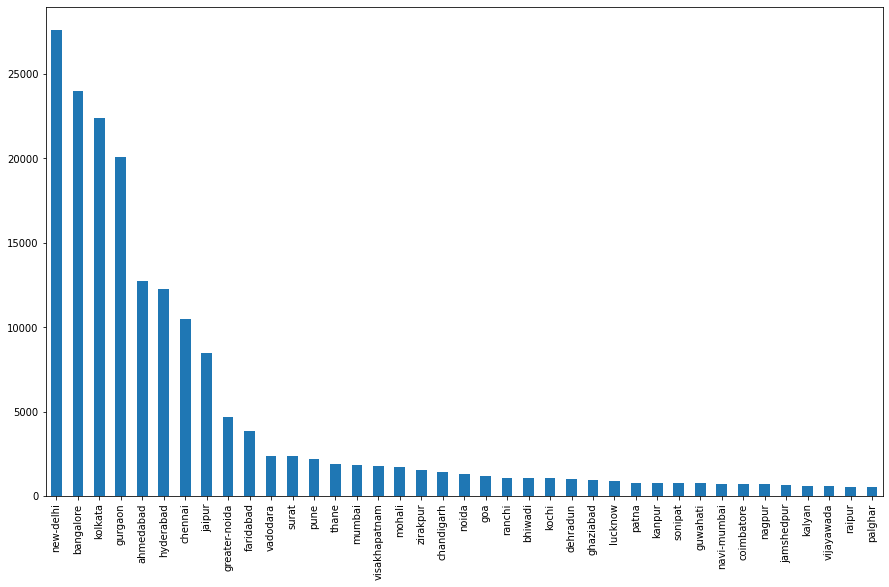

In [52]:
plt.figure(figsize=(15,9))
df['location'].value_counts().plot(kind='bar')
plt.show()

In [53]:
df['Amount(in rupees)'].value_counts()

Call for Price    9368
85 Lac            5168
65 Lac            4061
60 Lac            3686
70 Lac            3660
                  ... 
6.38 Cr              1
20.1 Lac             1
4.84 Cr              1
6.51 Cr              1
9.90 Cr              1
Name: Amount(in rupees), Length: 1540, dtype: int64

In [54]:
df=df[df['Amount(in rupees)']!='Call for Price']

In [55]:
df.shape

(170871, 22)

In [56]:
df['Amount(in rupees)'][0].split()

['42', 'Lac']

In [57]:
def num_sys(text):
    return text.split()[1]

In [58]:
df['num_sys']=df['Amount(in rupees)'].apply(num_sys)

In [59]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK,num_sys
54906,54906,2 BHK Ready to Occupy Flat for sale Ashok Viha...,Up for immediate sale is a 2 BHK apartment in ...,26.5 Lac,4907.0,gurgaon,600 sqft,Ready to Move,1 out of 4,Resale,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,Lac
95707,95707,2 BHK Ready to Occupy Flat for sale in Siddha ...,Multistorey apartment is available for sale. I...,34 Lac,4000.0,kolkata,780 sqft,Ready to Move,2 out of 4,Resale,...,Siddha Town,2,2,NaN,NaN,NaN,NaN,NaN,2,Lac
19783,19783,2 BHK Ready to Occupy Flat for sale Kengeri Sa...,This exquisite 2 BHK Flat is offered for sale ...,35 Lac,3846.0,bangalore,NaN,Ready to Move,3 out of 4,Resale,...,NaN,2,NaN,NaN,NaN,910 sqft,NaN,NaN,2,Lac
91493,91493,3 BHK Ready to Occupy Flat for sale in SGIL Ga...,This gorgeous 3 BHK Flat is available for sale...,46 Lac,4205.0,kolkata,825 sqft,Ready to Move,7 out of 8,Resale,...,SGIL Gardenia,2,2,NaN,NaN,NaN,NaN,NaN,3,Lac
118637,118637,3 BHK Ready to Occupy Flat for sale in DDA San...,One can find this stunning 3 BHK flat for sale...,1.56 Cr,9750.0,new-delhi,1350 sqft,Ready to Move,3 out of 10,Resale,...,DDA Sanskriti Apartments,2,3,"1 Covered,",Freehold,NaN,NaN,NaN,3,Cr


In [60]:
df['num_sys'].value_counts()

Lac    106639
Cr      64232
Name: num_sys, dtype: int64

In [61]:
df['Amount(in rupees)']=df['Amount(in rupees)'].str.replace(' Lac','')
df['Amount(in rupees)']=df['Amount(in rupees)'].str.replace(' Cr','')

In [62]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK,num_sys
24106,24106,2 BHK Ready to Occupy Flat for sale in SB Temp...,NaN,1.17,9161.0,bangalore,NaN,Ready to Move,NaN,New Property,...,NaN,2,NaN,1 Covered,NaN,1285 sqft,NaN,NaN,2,Cr
4751,4751,2 BHK Ready to Occupy Flat for sale in Ashraya...,This attractive 2 BHK apartment can be found f...,39,3939.0,ahmedabad,643 sqft,Ready to Move,5 out of 7,Resale,...,Ashraya 9,2,1,NaN,Freehold,NaN,NaN,NaN,2,Lac
144408,144408,4 BHK Ready to Occupy Flat for sale in Panchsh...,This attractive 4 BHK apartment can be found f...,4.15,12188.0,pune,2650 sqft,Ready to Move,20 out of 31,New Property,...,Panchshil Towers,5,2,NaN,Freehold,NaN,NaN,NaN,4,Cr
108826,108826,3 BHK Ready to Occupy Flat for sale in Diamond...,3 bedroom flat available for sale in Diamond C...,1.10,7666.0,kolkata,NaN,Ready to Move,12 out of 20,Resale,...,Diamond City South,2,2,1 Open,Freehold,1435 sqft,NaN,NaN,3,Cr
71959,71959,3 BHK Ready to Occupy Flat for sale Punjagutta...,Discover this immaculate 3 BHK flat for sale a...,2.15,9534.0,hyderabad,NaN,Ready to Move,2 out of 5,Resale,...,NaN,3,NaN,NaN,NaN,2255 sqft,NaN,NaN,3,Cr


In [63]:
df['Amount(in rupees)']=df['Amount(in rupees)'].astype('float')

In [64]:
df['Amount(in rupees)'].dtype

dtype('float64')

In [65]:
df_Lac=df[df['num_sys']=='Lac']
df_Cr=df[df['num_sys']=='Cr']

In [66]:
df_Lac['Amount(in rupees)']=df['Amount(in rupees)']*10000
df_Cr['Amount(in rupees)']=df['Amount(in rupees)']*10000000

In [67]:
df=pd.concat([df_Lac,df_Cr])

In [68]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK,num_sys
163083,163083,3 BHK Ready to Occupy Flat for sale in Sikka K...,3 BHK flat available for sale in Greater Noida...,669000.0,5350.0,greater-noida,NaN,Ready to Move,NaN,New Property,...,Sikka Kaamya Greens,2,NaN,1 Covered,NaN,1250 sqft,NaN,NaN,3,Lac
76807,76807,2 BHK Ready to Occupy Flat for sale in Sanjana...,"Kandlakoya, Hyderabad has an attractive 2 BHK ...",690000.0,NaN,hyderabad,956 sqft,Ready to Move,5 out of 5,Resale,...,NaN,2,1,1 Covered,Freehold,NaN,NaN,NaN,2,Lac
175362,175362,3 BHK Ready to Occupy Flat for sale in Pranami...,This exquisite 3 BHK Flat is offered for sale ...,871000.0,4750.0,ranchi,1376 sqft,Ready to Move,2 out of 4,New Property,...,Pranami Blue Sapphire,3,3,2 Covered,Freehold,NaN,NaN,NaN,3,Lac
143400,143400,2 BHK Ready to Occupy Flat for sale in Paras T...,Up for immediate sale is a 2 BHK apartment in ...,420000.0,4541.0,noida,NaN,Ready to Move,3 out of 19,Resale,...,NaN,2,3,NaN,NaN,925 sqft,NaN,NaN,2,Lac
29565,29565,2 BHK Ready to Occupy Flat for sale in Jai Gar...,Up for immediate sale is a 2 BHK apartment in ...,830000.0,6854.0,bangalore,880 sqft,Ready to Move,4 out of 5,Resale,...,NaN,2,2,NaN,Freehold,NaN,NaN,NaN,2,Lac


In [69]:
df.drop(columns=['num_sys'],axis=1,inplace=True)

In [70]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,...,"Garden/Park, Main Road",Virat Aangan,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.0,thane,550 sqft,Ready to Move,4 out of 5,Resale,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [71]:
df['Price (in rupees)'].dtype

dtype('float64')

In [72]:
df['Price (in rupees)'].isnull().sum()

7492

In [73]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [74]:
df['Price (in rupees)']=imputer.fit_transform(df['Price (in rupees)'].values.reshape(-1,1))

In [75]:
df['Price (in rupees)'].isnull().sum()

0

In [76]:
df['Carpet Area'].isnull().sum()

72751

In [77]:
df.shape

(170871, 22)

In [78]:
df.drop(columns=['Carpet Area'],axis=1,inplace=True)

In [79]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Status,Floor,Transaction,Furnishing,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
75707,75707,3 BHK Ready to Occupy Flat for sale in Silpa P...,Discover this immaculate 3 BHK flat for sale a...,12000000.0,6522.0,hyderabad,Ready to Move,1 out of 5,Resale,Semi-Furnished,...,Garden/Park,NaN,3,NaN,NaN,NaN,1840 sqft,NaN,NaN,3
88877,88877,4 BHK Ready to Occupy Flat for sale Raja Park,This ready to move-in 4 BHK flat is available ...,19500000.0,7222.0,jaipur,Ready to Move,3 out of 11,Resale,Semi-Furnished,...,"Pool, Main Road",NaN,4,3,1 Covered,Freehold,2700 sqft,NaN,NaN,4
59396,59396,2 BHK Ready to Occupy Flat for sale in Lotus H...,Have a look at this immaculate 2 BHK flat for ...,700000.0,10000.0,gurgaon,Ready to Move,8 out of 10,Resale,Semi-Furnished,...,NaN,Lotus Homz,2,2,NaN,NaN,700 sqft,NaN,NaN,2
26018,26018,3 BHK Ready to Occupy Flat for sale in Shriram...,This magnificent 3 BHK Flat is available for s...,850000.0,7296.0,bangalore,Ready to Move,10 out of 14,Resale,Unfurnished,...,"Garden/Park, Main Road",NaN,2,2,1 Covered,Freehold,NaN,NaN,NaN,3
179090,179090,3 BHK Ready to Occupy Flat for sale in Raghuvi...,This exquisite 3 BHK Flat is offered for sale ...,800000.0,4322.0,surat,Ready to Move,1 out of 13,Resale,Furnished,...,"Pool, Garden/Park, Main Road",Raghuvir Sentosa Heights,3,3,NaN,Co-operative Society,NaN,NaN,NaN,3


In [80]:
df['Status'].isnull().sum()

581

In [81]:
df.dropna(subset=['Status'],inplace=True)

In [82]:
df['Status'].isnull().sum()

0

In [83]:
df['Status'].value_counts()

Ready to Move    170290
Name: Status, dtype: int64

In [84]:
df.drop(columns=['Status'],axis=1,inplace=True)

In [85]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
133525,133525,4 BHK Ready to Occupy Flat for sale in Hamdam ...,Up for immediate sale is a 4 BHK apartment in ...,26800000.0,11167.0,new-delhi,8 out of 10,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Hamdam Apartment,3,4,"1 Covered,",Freehold,NaN,NaN,NaN,4
115799,115799,3 BHK Ready to Occupy Flat for sale Pochanpur ...,Up for immediate sale is a 3 BHK apartment in ...,650000.0,5000.0,new-delhi,1 out of 5,Resale,Furnished,NaN,NaN,NaN,2,NaN,NaN,NaN,1300 sqft,NaN,NaN,3
134816,134816,4 BHK Ready to Occupy Flat for sale Janakpuri ...,This gorgeous 4 BHK Flat is available for sale...,43500000.0,21481.0,new-delhi,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,NaN,4,2,"2 Covered,",Freehold,NaN,NaN,NaN,4
182743,182743,3 BHK Ready to Occupy Flat for sale in Nilambe...,This gorgeous 3 BHK Flat is available for sale...,900000.0,4390.0,vadodara,8 out of 10,Resale,Furnished,East,Main Road,Nilamber Edifice,3,2,1 Covered,Freehold,NaN,NaN,NaN,3
135210,135210,3 BHK Ready to Occupy Flat for sale in East of...,"East Of Kailash Block B, New Delhi has an appe...",23500000.0,20435.0,new-delhi,1 out of 4,New Property,Semi-Furnished,NaN,NaN,East of Kailash,3,2,NaN,NaN,NaN,NaN,NaN,3


In [86]:
df['Floor'].value_counts()

1 out of 4      11395
2 out of 4      11006
3 out of 4       7431
1 out of 3       6658
4 out of 4       5534
                ...  
30 out of 35        1
23 out of 36        1
14 out of 34        1
34 out of 42        1
7 out of 41         1
Name: Floor, Length: 923, dtype: int64

In [87]:
df['Floor'].isnull().sum()

6624

In [88]:
df.dropna(subset=['Floor'],inplace=True)

In [89]:
df['Floor'].isnull().sum()

0

In [90]:
df['Floor'][0].split('out')

['10 ', ' of 11']

In [91]:
df['Floor'][0].split('out')[0].strip()

'10'

In [92]:
df=df[df['Floor'].apply(lambda x: isinstance(x,str))]

In [93]:
def floor(text):
    return text.split('out')[0].strip()

In [94]:
df['Floor']=df['Floor'].apply(floor)

In [95]:
df['Floor'].dtype

dtype('O')

In [96]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
61567,61567,3 BHK Ready to Occupy Flat for sale in orchid ...,Up for immediate sale is a 3 BHK apartment in ...,17500000.0,9695.0,gurgaon,5,Resale,Unfurnished,NaN,NaN,orchid petals,3,3,NaN,NaN,NaN,NaN,NaN,3
39372,39372,2 BHK Ready to Occupy Flat for sale HAL 2nd St...,Carefully laid out in the prime location of HA...,13000000.0,11818.0,bangalore,2,New Property,Unfurnished,East,NaN,NaN,2,1,1 Covered,Freehold,NaN,NaN,NaN,2
153804,153804,2 BHK Ready to Occupy Flat for sale in Aviral ...,This ready to move-in 2 BHK flat is available ...,646000.0,4900.0,dehradun,3,New Property,Semi-Furnished,NaN,NaN,Aviral Greens,2,NaN,NaN,NaN,1319 sqft,NaN,NaN,2
47441,47441,3 BHK Ready to Occupy Flat for sale in Jain Su...,Up for immediate sale is a 3 BHK apartment in ...,800000.0,5517.0,chennai,1,Resale,Furnished,NaN,NaN,NaN,3,2,NaN,NaN,1450 sqft,NaN,NaN,3
42661,42661,2 BHK Ready to Occupy Flat for sale in Sri Vas...,This magnificent 2 BHK Flat is available for s...,450000.0,4956.0,chennai,2,Resale,Semi-Furnished,South,Garden/Park,NaN,2,2,1 Covered,Freehold,NaN,NaN,NaN,2


In [97]:
df['Floor'].value_counts()

1                 29623
2                 29310
3                 23709
4                 16432
5                 11343
Ground            10058
6                  6597
7                  6415
8                  5079
10                 4916
12                 3743
11                 2969
9                  2856
15                 1605
14                 1572
18                 1185
16                 1163
13                  986
17                  963
19                  876
32                  721
20                  330
21                  255
Upper Basement      178
23                  140
22                   95
Lower Basement       92
25                   90
24                   75
26                   60
28                   50
30                   44
27                   31
29                   22
33                   12
31                   11
35                   11
34                   10
40                    8
38                    5
42                    4
60              

In [98]:
def floor2(text):
    if 'Ground' in text:
        return '0'
    elif 'Upper Basement' in text:
        return '-1'
    elif 'Lower Basement' in text:
        return '-2'
    else:
        return text

In [99]:
df['Floor']=df['Floor'].apply(floor2)

In [100]:
val=['-1','-2']
for i in val:
    df=df[df['Floor']!=i]

In [101]:
df['Floor'].value_counts()

1      29623
2      29310
3      23709
4      16432
5      11343
0      10058
6       6597
7       6415
8       5079
10      4916
12      3743
11      2969
9       2856
15      1605
14      1572
18      1185
16      1163
13       986
17       963
19       876
32       721
20       330
21       255
23       140
22        95
25        90
24        75
26        60
28        50
30        44
27        31
29        22
33        12
31        11
35        11
34        10
40         8
38         5
42         4
60         4
37         3
39         3
45         3
44         2
36         2
59         2
51         2
200        1
Name: Floor, dtype: int64

In [102]:
df['Floor']=df['Floor'].astype('int')

In [103]:
df.sample(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
89057,89057,4 BHK Ready to Occupy Flat for sale Raja Park,This ready to move-in 4 BHK flat is available ...,19500000.0,7222.0,jaipur,3,Resale,Semi-Furnished,West,"Pool, Main Road",NaN,4,3,1 Covered,Freehold,2700 sqft,NaN,NaN,4
22005,22005,2 BHK Ready to Occupy Flat for sale in Jai Gar...,Up for immediate sale is a 2 BHK apartment in ...,830000.0,6854.0,bangalore,4,Resale,Unfurnished,North,"Garden/Park, Pool, Main Road",NaN,2,2,NaN,Freehold,NaN,NaN,NaN,2
156206,156206,3 BHK Ready to Occupy Flat for sale in Adore H...,"Sector 86, Faridabad has an appealing 3 BHK fl...",360000.0,3600.0,faridabad,5,Resale,Unfurnished,North,Main Road,Adore Happy Homes Exclusive phase 2,2,3,1 Open,Freehold,NaN,NaN,NaN,3
70477,70477,3 BHK Ready to Occupy Flat for sale INDRAPRAST...,Discover this immaculate 3 BHK flat for sale a...,780000.0,5673.0,hyderabad,2,Resale,Unfurnished,NaN,NaN,NaN,2,1,NaN,NaN,1375 sqft,NaN,NaN,3
9297,9297,3 BHK Ready to Occupy Flat for sale Jagatpur,This ready to move-in 3 BHK flat is available ...,640000.0,3647.0,ahmedabad,5,Resale,Unfurnished,NaN,NaN,NaN,3,NaN,NaN,NaN,1755 sqft,NaN,NaN,3


In [104]:
df['Transaction'].isnull().sum()

57

In [105]:
df.dropna(subset=['Transaction'],inplace=True)

In [106]:
df['Transaction'].isnull().sum()

0

In [107]:
df['Transaction'].value_counts()

Resale          126634
New Property     36003
Other              702
Name: Transaction, dtype: int64

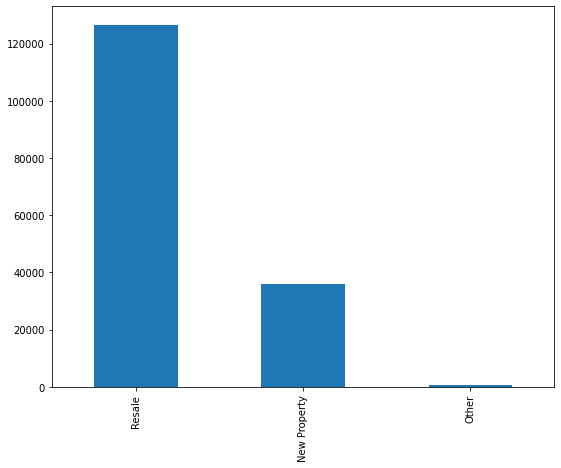

In [108]:
plt.figure(figsize=(9,7))
df['Transaction'].value_counts().plot(kind='bar')
plt.show()

In [109]:
df['Furnishing'].value_counts()

Semi-Furnished    78658
Unfurnished       65335
Furnished         18077
Name: Furnishing, dtype: int64

In [110]:
df['Furnishing'].isnull().sum()

1269

In [111]:
df.dropna(subset=['Furnishing'],inplace=True)

In [112]:
df['Furnishing'].isnull().sum()

0

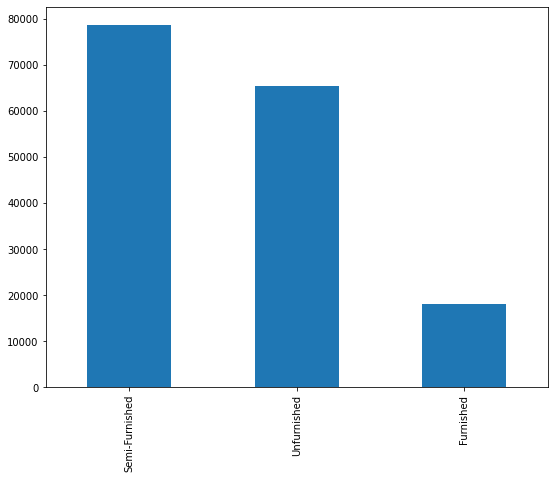

In [113]:
plt.figure(figsize=(9,7))
df['Furnishing'].value_counts().plot(kind='bar')
plt.show()

In [114]:
df['facing'].isnull().sum()

55438

In [115]:
df.drop(columns=['facing'],axis=1,inplace=True)

In [116]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,"Garden/Park, Main Road",Virat Aangan,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [117]:
df['overlooking'].isnull().sum()

66195

In [118]:
df.drop(columns=['overlooking'],axis=1,inplace=True)

In [119]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,Virat Aangan,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [120]:
df['Society'].isnull().sum()

92863

In [121]:
df['Society'].value_counts()

Hamdam Apartment                       1648
Malibu Town                            1158
Shree Vardhman Victoria                1154
DLF Skycourt                           1151
Nebula Tower                            982
                                       ... 
DDA Pocket B4                             1
DDA Rose Apartments                       1
Anmol Vatika                              1
Saini Builder Floors                      1
Srushti Siddhi Mangal Murti Complex       1
Name: Society, Length: 8779, dtype: int64

In [122]:
df.drop(columns=['Society'],axis=1,inplace=True)

In [123]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,NaN,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [124]:
df['Bathroom'].isnull().sum()

34

In [125]:
df['Bathroom'].dtype

dtype('O')

In [126]:
df['Bathroom'].unique()

array(['1', '2', '3', '4', nan, '7', '5', '6', '> 10', '8', '9', '10'],
      dtype=object)

In [127]:
df['Bathroom'].value_counts()

2       81158
3       49143
4       14351
1       14106
5        3119
6         134
7          12
8           5
> 10        4
9           3
10          1
Name: Bathroom, dtype: int64

In [128]:
df.dropna(subset=['Bathroom'],inplace=True)

In [129]:
df['Bathroom'].isnull().sum()

0

In [130]:
df=df[df['Bathroom']!='> 10']

In [131]:
df['Bathroom'].value_counts()

2     81158
3     49143
4     14351
1     14106
5      3119
6       134
7        12
8         5
9         3
10        1
Name: Bathroom, dtype: int64

In [132]:
df['Bathroom']=df['Bathroom'].astype('int')

In [133]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,NaN,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,NaN,1 Open,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,NaN,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,NaN,NaN,NaN,NaN,NaN,NaN,1


In [134]:
df['Balcony'].isnull().sum()

38006

In [135]:
df['Balcony'].dtype

dtype('O')

In [136]:
df['Balcony'].unique()

array(['2', nan, '1', '3', '4', '5', '6', '10', '> 10', '7', '8', '9'],
      dtype=object)

In [137]:
df.shape

(162032, 17)

In [138]:
df=df[df['Balcony']!='> 10']

In [139]:
df['Balcony'].value_counts()

2     48442
1     41743
3     23994
4      8990
5       709
6       114
7        11
10        9
8         9
9         2
Name: Balcony, dtype: int64

In [140]:
df['Balcony']=df['Balcony'].fillna('2')

In [141]:
df['Balcony'].isnull().sum()

0

In [142]:
df['Balcony']=df['Balcony'].astype('int')

In [143]:
df['Balcony'].value_counts()

2     86448
1     41743
3     23994
4      8990
5       709
6       114
7        11
10        9
8         9
9         2
Name: Balcony, dtype: int64

In [144]:
df['Car Parking'].isnull().sum()

86520

In [145]:
df.drop(columns=['Car Parking'],axis=1,inplace=True)

In [146]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,Ownership,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,NaN,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,2,Freehold,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,NaN,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,Co-operative Society,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,2,NaN,NaN,NaN,NaN,1


In [147]:
df['Ownership'].isnull().sum()

53300

In [148]:
df['Ownership'].value_counts()

Freehold                99760
Leasehold                4974
Co-operative Society     3026
Power Of Attorney         969
Name: Ownership, dtype: int64

In [149]:
df.drop(columns=['Ownership'],axis=1,inplace=True)

In [150]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,Super Area,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,NaN,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,2,NaN,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,NaN,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,680 sqft,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,2,NaN,NaN,NaN,1


In [151]:
df['Super Area'].isnull().sum()

95660

In [152]:
df.drop(columns=['Super Area'],axis=1,inplace=True)

In [153]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,Dimensions,Plot Area,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,NaN,NaN,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,2,NaN,NaN,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,NaN,NaN,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,NaN,NaN,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,2,NaN,NaN,1


In [154]:
df['Dimensions'].isnull().sum()

162029

In [155]:
df['Plot Area'].isnull().sum()

162029

In [156]:
df.drop(columns=['Dimensions','Plot Area'],axis=1,inplace=True)

In [157]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,2,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,1
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,1
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,2,1


In [158]:
df.drop(columns=['Index','Title','Description'],axis=1,inplace=True)

In [159]:
df.head()

,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,BHK
0,420000.0,6000.000000,thane,10,Resale,Unfurnished,1,2,1
1,980000.0,13799.000000,thane,3,Resale,Semi-Furnished,2,2,2
3,250000.0,7592.314973,thane,1,Resale,Unfurnished,1,1,1
5,450000.0,6618.000000,thane,2,Resale,Unfurnished,1,1,1
6,165000.0,2538.000000,thane,4,Resale,Unfurnished,1,2,1


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162029 entries, 0 to 187530
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount(in rupees)  162029 non-null  float64
 1   Price (in rupees)  162029 non-null  float64
 2   location           162029 non-null  object 
 3   Floor              162029 non-null  int32  
 4   Transaction        162029 non-null  object 
 5   Furnishing         162029 non-null  object 
 6   Bathroom           162029 non-null  int32  
 7   Balcony            162029 non-null  int32  
 8   BHK                162029 non-null  int32  
dtypes: float64(2), int32(4), object(3)
memory usage: 9.9+ MB


In [161]:
df.isnull().sum()

Amount(in rupees)    0
Price (in rupees)    0
location             0
Floor                0
Transaction          0
Furnishing           0
Bathroom             0
Balcony              0
BHK                  0
dtype: int64

In [162]:
df.shape

(162029, 9)

In [163]:
numeric_columns=[]
for i in df.columns:
    if df[i].dtype!='object':
        numeric_columns.append(i)

In [164]:
numeric_columns

['Amount(in rupees)',
 'Price (in rupees)',
 'Floor',
 'Bathroom',
 'Balcony',
 'BHK']

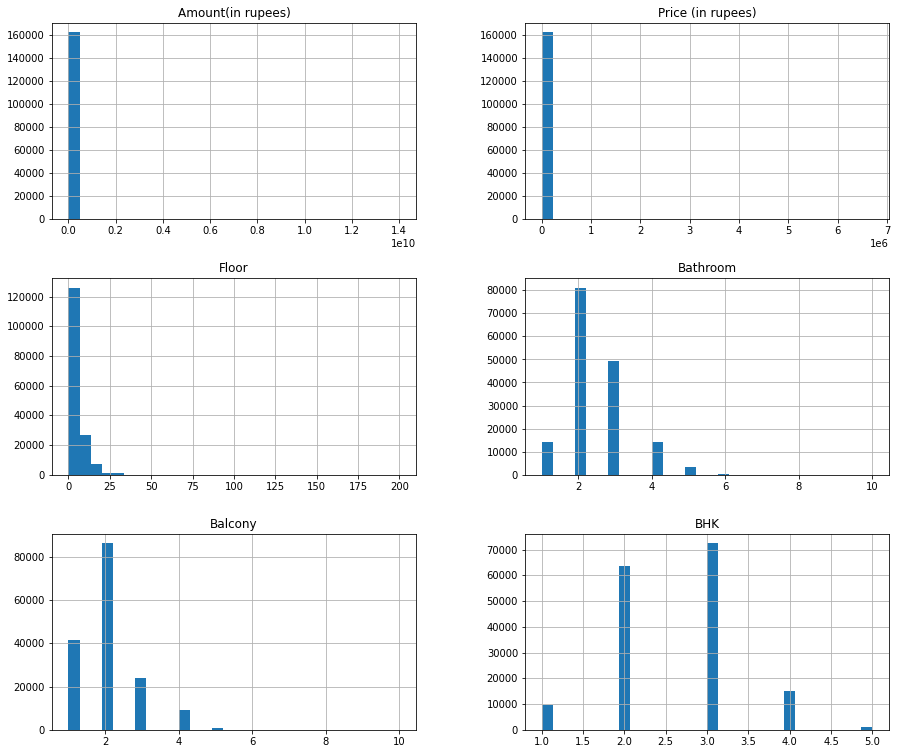

In [165]:
df[numeric_columns].hist(figsize=(15,13),bins=30)
plt.show()

In [166]:
cols=['Floor','Bathroom','Balcony','BHK']

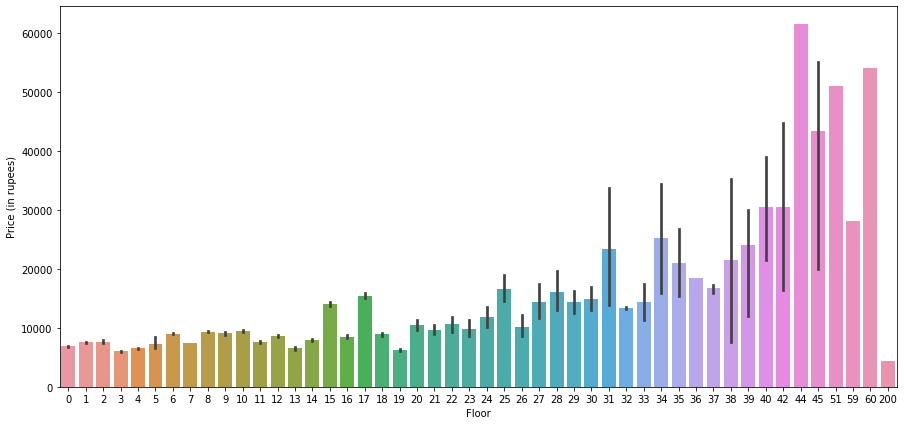

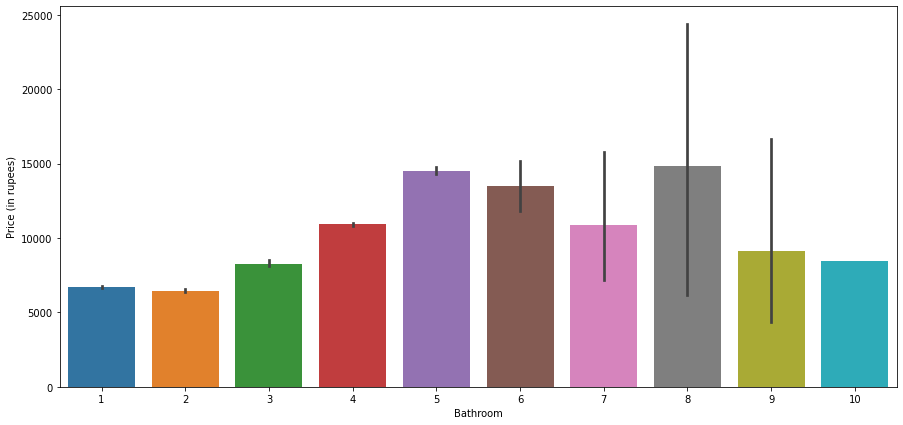

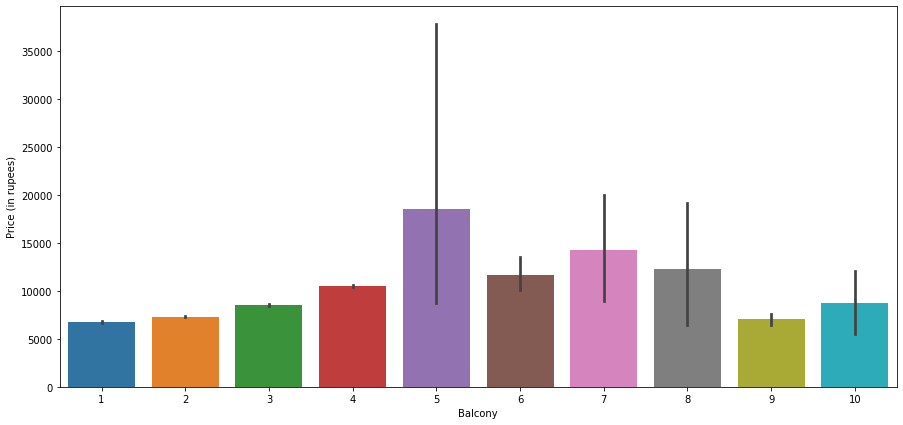

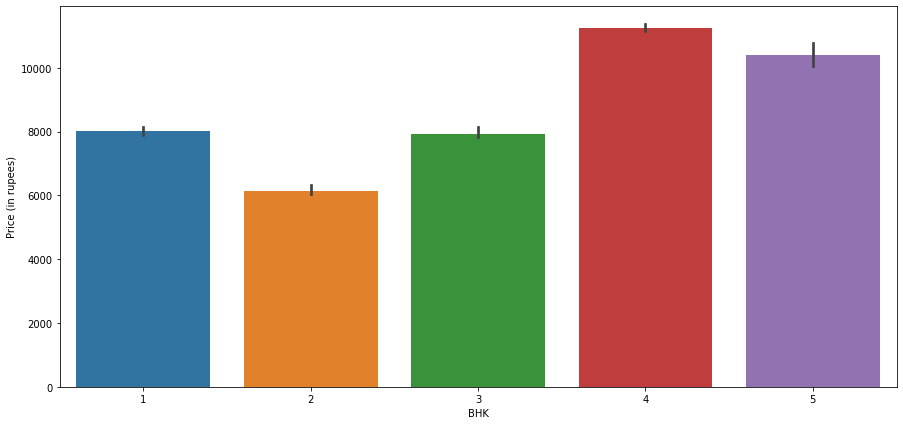

In [167]:
for i in cols:
    plt.figure(figsize=(15,7))
    sns.barplot(data=df,x=i,y='Price (in rupees)')
    plt.show()

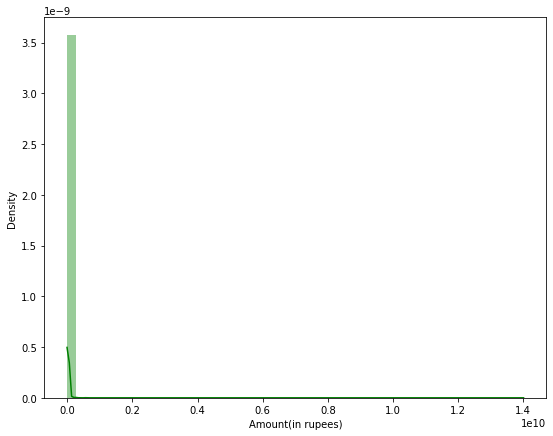

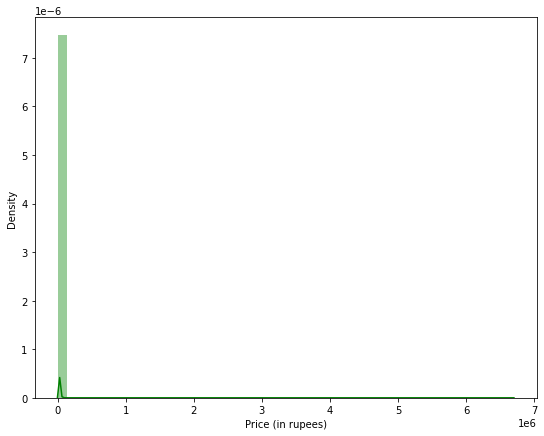

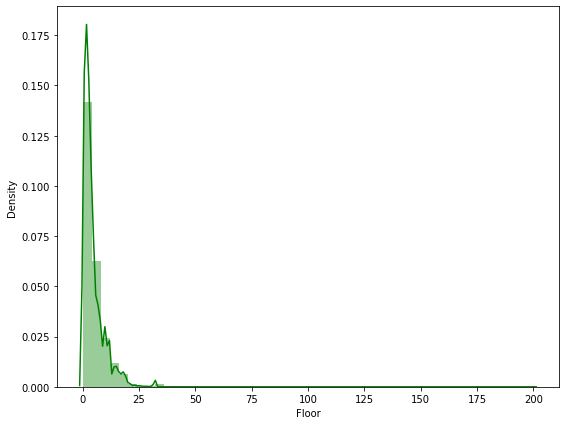

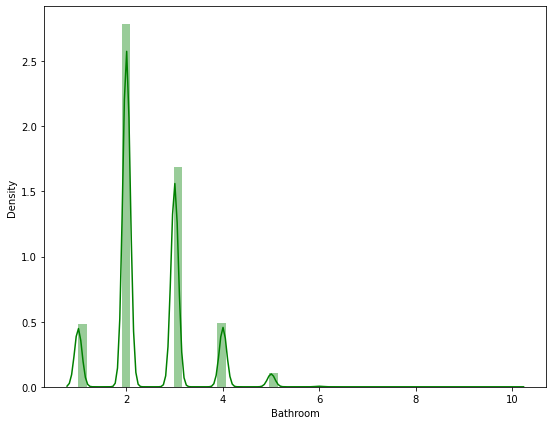

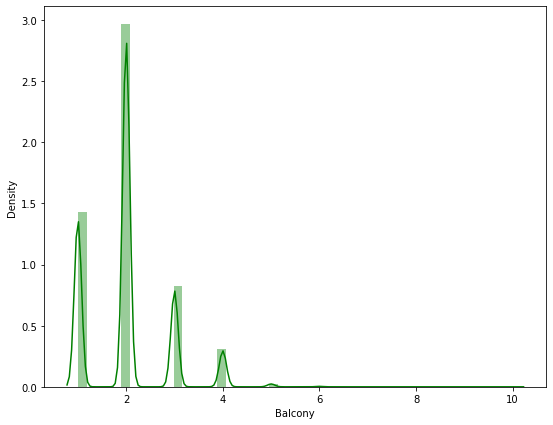

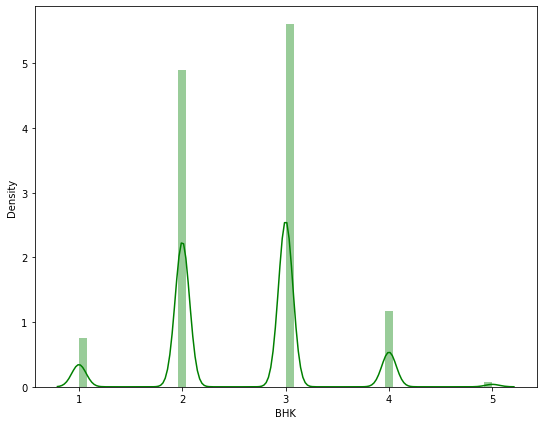

In [168]:
for i in numeric_columns:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],color='green')
    plt.show()

In [169]:
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR=q3-q1
    global LLP
    global ULP
    LLP=q1-1.5*IQR
    ULP=q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print('No outliers in',i)
    else:
        print('There are outliers in',i)
        x=data[data[col]<LLP][col].size
        y=data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are: ',x+y)
global a
a=[]
for i in numeric_columns:
    count_outliers(df,i)

There are outliers in Amount(in rupees)
Count of outliers are:  6775
There are outliers in Price (in rupees)
Count of outliers are:  7563
There are outliers in Floor
Count of outliers are:  10073
There are outliers in Bathroom
Count of outliers are:  3272
There are outliers in Balcony
Count of outliers are:  9844
There are outliers in BHK
Count of outliers are:  1060


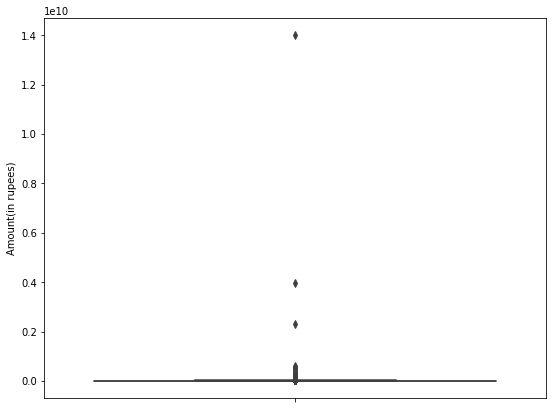

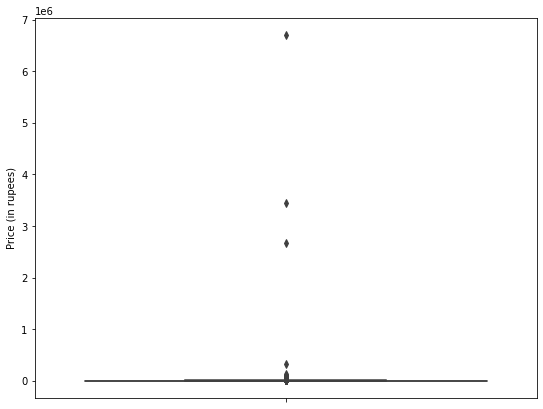

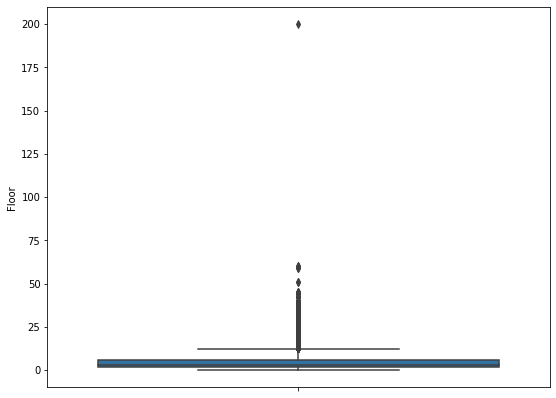

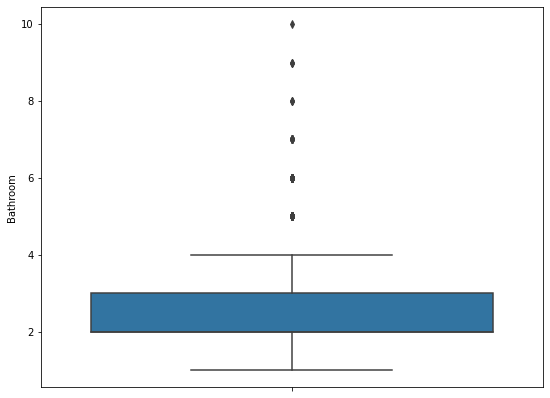

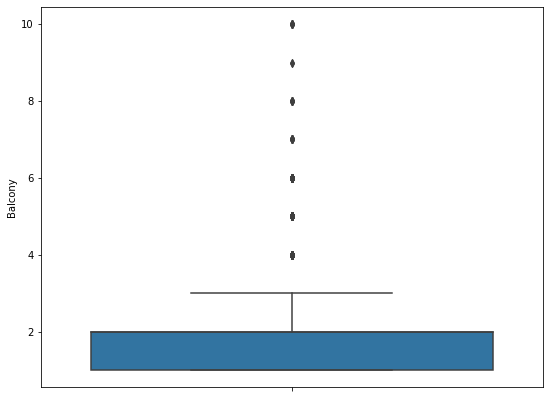

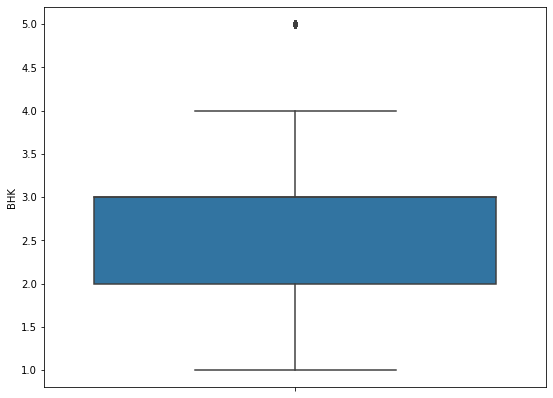

In [170]:
for i in numeric_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=i)
    plt.show()

In [171]:
df['Amount(in rupees)'].mean()

8932116.386572774

In [172]:
df[df['Amount(in rupees)']>35000000].shape

(7390, 9)

In [173]:
df=df[df['Amount(in rupees)']<35000000]

In [174]:
df['Price (in rupees)'].mean()

6995.75466876032

In [175]:
df[df['Price (in rupees)']>15000].shape

(5033, 9)

In [176]:
df=df[df['Price (in rupees)']<15000]

In [177]:
df[df['Floor']>11].shape

(10823, 9)

In [178]:
df=df[df['Floor']<11]

In [179]:
df[df['Bathroom']>4].shape

(702, 9)

In [180]:
df=df[df['Bathroom']<4]

In [181]:
df[df['Balcony']>5].shape

(32, 9)

In [182]:
df=df[df['Balcony']<5]

In [183]:
df[df['BHK']>4.5].shape

(33, 9)

In [184]:
df=df[df['BHK']<4.5]

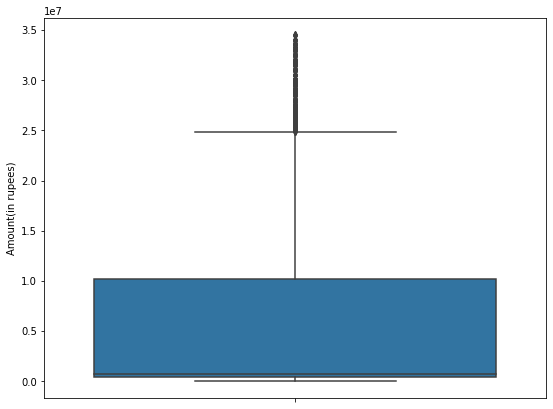

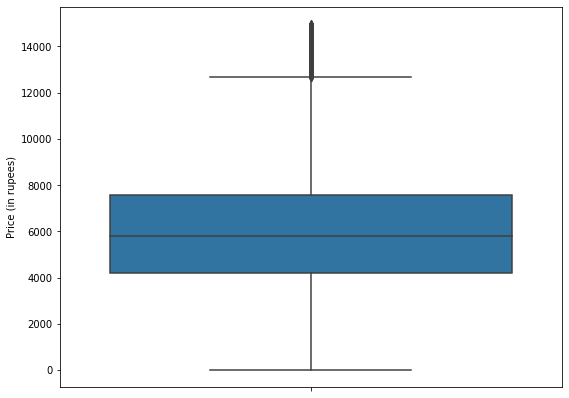

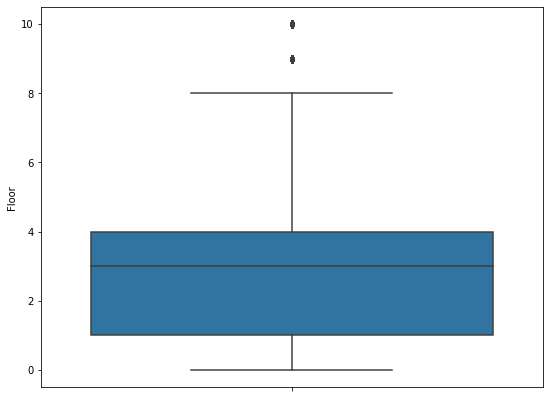

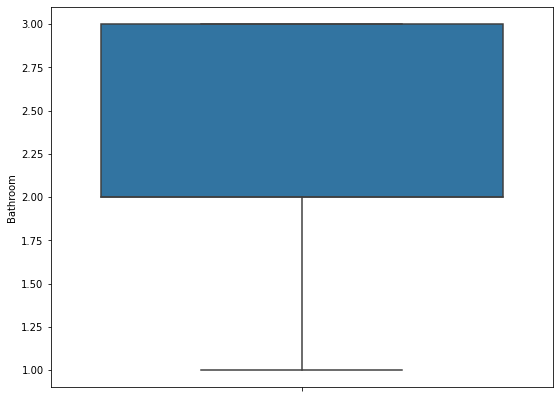

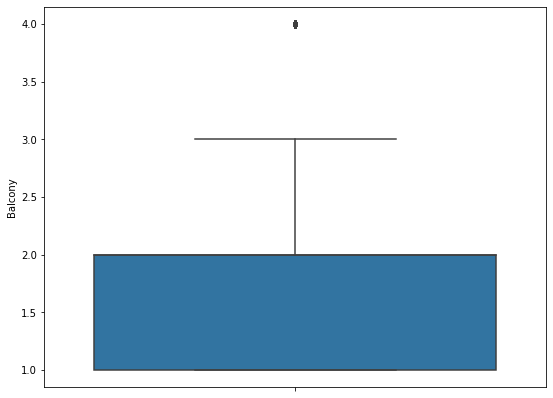

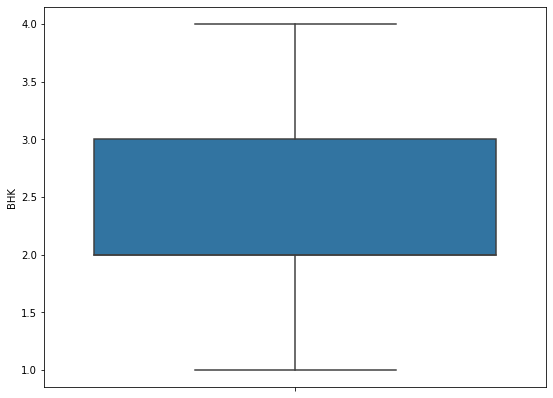

In [185]:
for i in numeric_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=i)
    plt.show()

In [186]:
df.shape

(126276, 9)

In [187]:
df[df['Amount(in rupees)']>24000000].shape

(3005, 9)

In [188]:
df=df[df['Amount(in rupees)']<24000000]

In [189]:
df[df['Price (in rupees)']>12500].shape

(4318, 9)

In [190]:
df=df[df['Price (in rupees)']<12500]

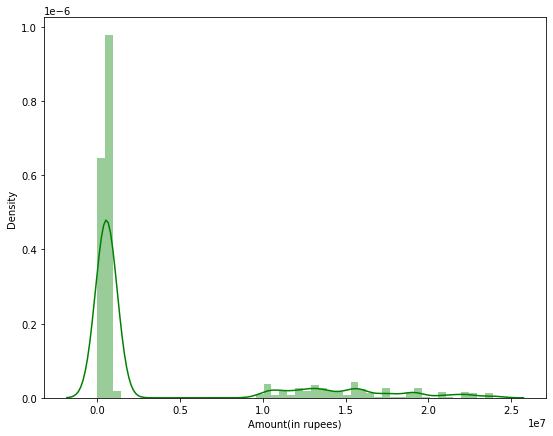

In [191]:
plt.figure(figsize=(9,7))
sns.distplot(df['Amount(in rupees)'],color='green')
plt.show()

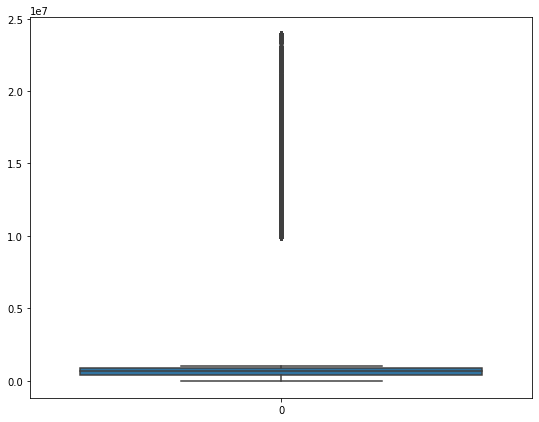

In [192]:
plt.figure(figsize=(9,7))
sns.boxplot(df['Amount(in rupees)'])
plt.show()

In [193]:
df[df['Amount(in rupees)']>900000].shape

(29217, 9)

In [194]:
df=df[df['Amount(in rupees)']<900000]

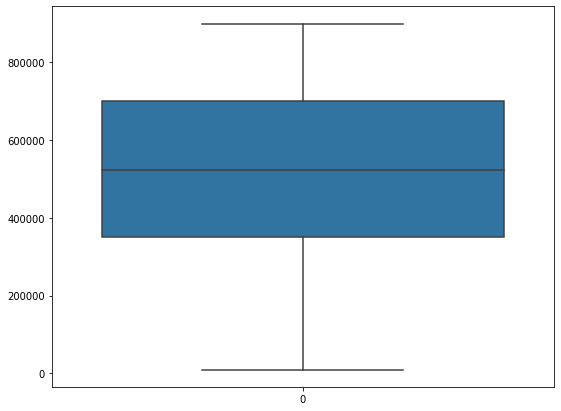

In [195]:
plt.figure(figsize=(9,7))
sns.boxplot(df['Amount(in rupees)'])
plt.show()

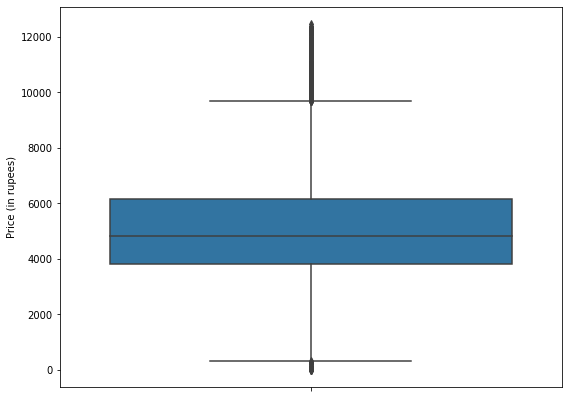

In [196]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='Price (in rupees)')
plt.show()

In [197]:
df[df['Price (in rupees)']>9500].shape

(1794, 9)

In [198]:
df=df[df['Price (in rupees)']<9500]

In [199]:
df[df['Price (in rupees)']<200].shape

(13, 9)

In [200]:
df=df[df['Price (in rupees)']>200]

In [201]:
df.shape

(85346, 9)

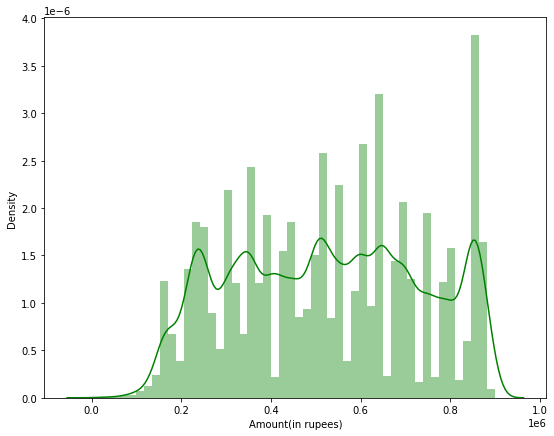

In [202]:
plt.figure(figsize=(9,7))
sns.distplot(df['Amount(in rupees)'],color='green')
plt.show()

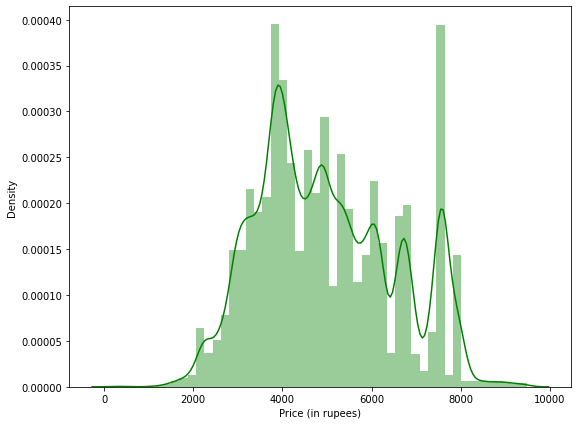

In [203]:
plt.figure(figsize=(9,7))
sns.distplot(df['Price (in rupees)'],color='green')
plt.show()

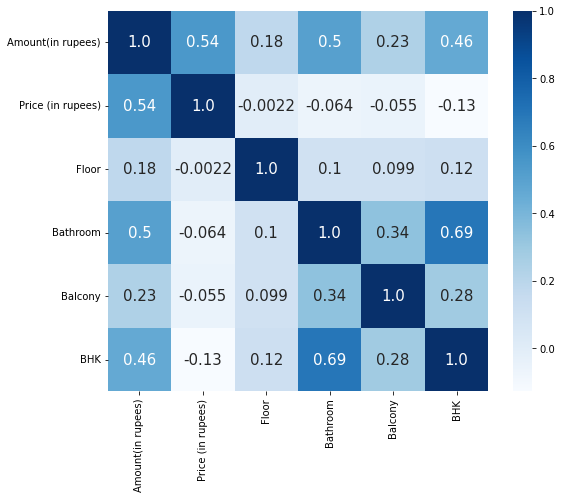

In [204]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [205]:
X=df.drop(columns=['Price (in rupees)'],axis=1)
y=df['Price (in rupees)']

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [207]:
len(X_train)

68276

In [208]:
len(X_test)

17070

In [209]:
X_train

,Amount(in rupees),location,Floor,Transaction,Furnishing,Bathroom,Balcony,BHK
47434,581000.0,chennai,2,New Property,Unfurnished,2,1,2
103325,250000.0,kolkata,0,Resale,Unfurnished,2,1,2
127172,165000.0,new-delhi,3,Resale,Unfurnished,1,1,1
13654,370000.0,ahmedabad,5,Resale,Unfurnished,2,2,2
151857,750000.0,chandigarh,8,Resale,Unfurnished,3,3,3
...,...,...,...,...,...,...,...,...
12874,370000.0,ahmedabad,5,Resale,Unfurnished,2,2,2
113553,600000.0,lucknow,0,Resale,Semi-Furnished,3,3,3
173987,875000.0,patna,4,New Property,Unfurnished,2,2,2
2682,450000.0,ahmedabad,2,Resale,Furnished,2,1,2


In [210]:
y_train

47434     6300.000000
103325    7592.314973
127172    4074.000000
13654     3575.000000
151857    4259.000000
             ...     
12874     3575.000000
113553    3371.000000
173987    7292.000000
2682      4167.000000
28874     5472.000000
Name: Price (in rupees), Length: 68276, dtype: float64

In [211]:
transformer_list=[('encode',OneHotEncoder(sparse=False,drop='first'),[1,3,4]),
                 ('scale',StandardScaler(),[0,2,5,6,7])]

In [340]:
step1=ColumnTransformer(transformer_list,remainder='passthrough')
rf=RandomForestRegressor(n_estimators=150,max_depth=30,min_samples_split=4,max_features=0.5)
xgb=XGBRegressor(max_depth=9)
et=ExtraTreesRegressor(max_depth=30,min_samples_split=4,max_features=0.5)
step2=VotingRegressor([('rf',rf),('xgb',xgb),('et',et)],weights=[1,1,5])
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 Score is: ',r2_score(y_pred,y_test))
print('Mean Absolute Error is: ',mean_absolute_error(y_pred,y_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_test)))

R2 Score is:  0.8105378873844269
Mean Absolute Error is:  257.3793660223187
RMSE:  617.8741139724107


In [344]:
pickle.dump(df,open('df1.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))